In [4]:
import pandas as pd
import numpy as np
import re
import json
from pandas import json_normalize
import ast

#Se leen ambas datas proporcionadas

In [2]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [6]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/Henry/movies_dataset.csv')


<ipython-input-6-86205a27b7d2>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/DATASET/Henry/movies_dataset.csv')


In [7]:
df.shape

(45466, 24)

In [8]:
df2 = pd.read_csv('/content/drive/MyDrive/DATASET/Henry/credits.csv')

In [9]:
df2.shape

(45476, 3)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(4)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0


In [ ]:
df2.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


#Limpieza de data

belongs_to_collection



In [ ]:
def extract_name(value):
    if isinstance(value, str):  #Si no es una cadena, se devuelve None
        try:
            dictionary = ast.literal_eval(value) #Convierte la cadena en un diccionario de Python
            if isinstance(dictionary, dict) and 'name' in dictionary: #Si ambas condiciones se cumplen, se devuelve 'name'
                return dictionary['name']
        except (ValueError, SyntaxError):
            pass
    return None

df['collection_name'] = df['belongs_to_collection'].apply(extract_name) #Se asigna a la nueva columna 'collection_name' del DataFrame.

genres

In [ ]:
def extract_genre_name(value):
    if isinstance(value, str):  #Si no es una cadena, se devuelve None.
        try:
            genres_list = ast.literal_eval(value) #Esto convierte la cadena en una lista de diccionarios.
            genre_names = [genre['name'] for genre in genres_list] # Extrae el valor asociado a la clave 'name' de cada diccionario.
            return ', '.join(genre_names) # unir los nombres de género en una cadena
        except (ValueError, SyntaxError):
            pass
    return None

df['genre_names'] = df['genres'].apply(extract_genre_name) #Se asigna a la columna "genre_names" del DataFrame

languages

In [ ]:
def extract_language_names(value):
    if isinstance(value, str):  #Si no es una cadena, se devuelve None.
        try:
            language_list = ast.literal_eval(value)  #Esto convierte la cadena en una lista de diccionarios.
            language_names = [language['name'] for language in language_list] # Extrae el valor asociado a la clave 'name' de cada diccionario.
            return ', '.join(language_names) 
        except (ValueError, SyntaxError):
            pass
    return None

df['language_names'] = df['spoken_languages'].apply(extract_language_names) #Se asigna a la columna "spoken_languages" del DataFrame

Productoras

In [ ]:
def extract_production_companies(value):
    if isinstance(value, str):  #Si no es una cadena, se devuelve None.
        try:
            companies_list = ast.literal_eval(value) #Esto convierte la cadena en una lista de diccionarios.
            if isinstance(companies_list, list):
                company_names = [company['name'] for company in companies_list] # Extrae el valor asociado a la clave 'name' de cada diccionario.
                return ', '.join(company_names)
        except (ValueError, SyntaxError):
            pass
    return None

df['production_company_names'] = df['production_companies'].apply(extract_production_companies) #Se asigna a la columna "production_companies" del DataFrame

País en el que se produjo

In [ ]:
def extract_country_names(value):
    if isinstance(value, str):  #Si no es una cadena, se devuelve None.
        try:
            countries_list = ast.literal_eval(value) #Esto convierte la cadena en una lista de diccionarios.
            if isinstance(countries_list, list):
                country_names = [country['name'] for country in countries_list] # Extrae el valor asociado a la clave 'name' de cada diccionario.
                return ', '.join(country_names)
        except (ValueError, SyntaxError):
            pass
    return None

df['country_names'] = df['production_countries'].apply(extract_country_names) #Se asigna a la columna "production_countries" del DataFrame

#Limpieza Data 2

cast

In [ ]:
def extract_actor_name(cast):
    try:
        actor_list = ast.literal_eval(cast)  # Esto convierte la cadena en una lista de diccionarios.
        actor_names = [actor['name'] for actor in actor_list]  # Obtiene el valor asociado a la clave 'name' de cada diccionario
        return ', '.join(actor_names)  # Une los nombres de los actores en una cadena separada por comas
    except (ValueError, SyntaxError):
        return None

In [ ]:
df2['actor_names'] = df2['cast'].apply(lambda x: extract_actor_name(x)) #Agrega una nueva columna llamada "actor_names"

In [ ]:
df2

,cast,crew,id,actor_names
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"Whitney Houston, Angela Bassett, Loretta Devin..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"Steve Martin, Diane Keaton, Martin Short, Kimb..."
...,...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,"Leila Hatami, Kourosh Tahami, Elham Korda"
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,"Angel Aquino, Perry Dizon, Hazel Orencio, Joel..."
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,"Erika Eleniak, Adam Baldwin, Julie du Page, Ja..."
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,"Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav..."


crew

In [ ]:
#Evaluar la cadena de texto JSON y convierte en una estructura de datos de Python
directors = df2['crew'].apply(eval).apply(lambda x: [d['name'] for d in x if d['job'] == 'Director'])
#Se obtiene el nombre de director en cada lista, si la lista está vacía se asigna 'None'
directors = directors.apply(lambda x: x[0] if len(x) > 0 else None)

In [ ]:
#Asigna los valores de la variable directors a una nueva columna 
df2['director'] = directors

#Unión de los datasets

In [ ]:
# Concatenar los DataFrames por el ID
merged_df = pd.concat([df, df2], axis=1, join='inner')

#Data Frame Limpio 

In [ ]:
#Se eliminan columnas del dataframe concatenado
columns_to_drop = ['video', 'imdb_id', 'adult', 'poster_path', 'homepage', 'crew', 'cast',
                   'belongs_to_collection', 'genres', 'spoken_languages',
                   'production_countries', 'production_companies']

clean_df = merged_df.drop(columns=columns_to_drop)

In [ ]:
clean_df.head(5)

,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,collection_name,genre_names,language_names,production_company_names,country_names,id,actor_names,director
0,30000000,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,"Animation, Comedy, Family",English,Pixar Animation Studios,United States of America,862,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,65000000,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,None,"Adventure, Fantasy, Family","English, Français","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,8844,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,0,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"Romance, Comedy",English,"Warner Bros., Lancaster Gate",United States of America,15602,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,16000000,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,None,"Comedy, Drama, Romance",English,Twentieth Century Fox Film Corporation,United States of America,31357,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,0,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,Comedy,English,"Sandollar Productions, Touchstone Pictures",United States of America,11862,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer


#Revisión de Nulos

In [ ]:
clean_df.isna().sum()

budget                          0
id                              0
original_language              11
original_title                  0
overview                      954
popularity                      5
release_date                   87
revenue                         6
runtime                       263
status                         87
tagline                     25054
title                           6
vote_average                    6
vote_count                      6
collection_name             40975
genre_names                     0
language_names                  6
production_company_names        6
country_names                   6
id                              0
actor_names                     0
director                      887
dtype: int64

In [ ]:
# Rellenar los campos "revenue" y "budget" con ceros
clean_df['revenue'] = clean_df['revenue'].fillna(0)
clean_df['budget'] = clean_df['budget'].fillna(0)

In [ ]:
# Eliminar filas con valores nulos en el campo "release_date"
clean_df = clean_df.dropna(subset=['release_date'])

In [ ]:
#Formato AAAA-mm-dd 
clean_df['release_date'] = pd.to_datetime(clean_df['release_date'], errors='coerce')

<ipython-input-78-6004c29f6ea5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['release_date'] = pd.to_datetime(clean_df['release_date'], errors='coerce')


In [ ]:
#Extracción del año
clean_df['release_year'] = clean_df['release_date'].dt.year

<ipython-input-79-1e92275edbb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['release_year'] = clean_df['release_date'].dt.year


In [ ]:
#Creación de 'return', dividiendo revenue / budget
clean_df['revenue'] = pd.to_numeric(clean_df['revenue'], errors='coerce')
clean_df['budget'] = pd.to_numeric(clean_df['budget'], errors='coerce')
clean_df['return'] = clean_df.apply(lambda x: round(x['revenue'] / x['budget'], 2) if x['budget'] != 0 else 0, axis=1)

<ipython-input-80-288135809394>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['revenue'] = pd.to_numeric(clean_df['revenue'], errors='coerce')


In [ ]:
clean_df.head()

,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,collection_name,genre_names,language_names,production_company_names,country_names,id,actor_names,director,release_year,return
0,30000000.0,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,"Animation, Comedy, Family",English,Pixar Animation Studios,United States of America,862,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,1995.0,12.45
1,65000000.0,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,None,"Adventure, Fantasy, Family","English, Français","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,8844,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston,1995.0,4.04
2,0.0,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"Romance, Comedy",English,"Warner Bros., Lancaster Gate",United States of America,15602,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch,1995.0,0.00
3,16000000.0,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,None,"Comedy, Drama, Romance",English,Twentieth Century Fox Film Corporation,United States of America,31357,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker,1995.0,5.09
4,0.0,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,Comedy,English,"Sandollar Productions, Touchstone Pictures",United States of America,11862,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer,1995.0,0.00


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45379 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   budget                    45376 non-null  float64       
 1   id                        45379 non-null  object        
 2   original_language         45368 non-null  object        
 3   original_title            45379 non-null  object        
 4   overview                  44438 non-null  object        
 5   popularity                45377 non-null  object        
 6   release_date              45376 non-null  datetime64[ns]
 7   revenue                   45379 non-null  float64       
 8   runtime                   45130 non-null  float64       
 9   status                    45296 non-null  object        
 10  tagline                   20398 non-null  object        
 11  title                     45376 non-null  object        
 12  vote_average      

#Nuevo archivo csv con datos a usar

In [ ]:
# Seleccionar las columnas deseadas
columnas_deseadas = ['title', 'director', 'actor_names', 'release_date', 'popularity', 'vote_average','vote_count', 'budget', 'revenue','return']
nuevo_df = clean_df[columnas_deseadas]

<Axes: >

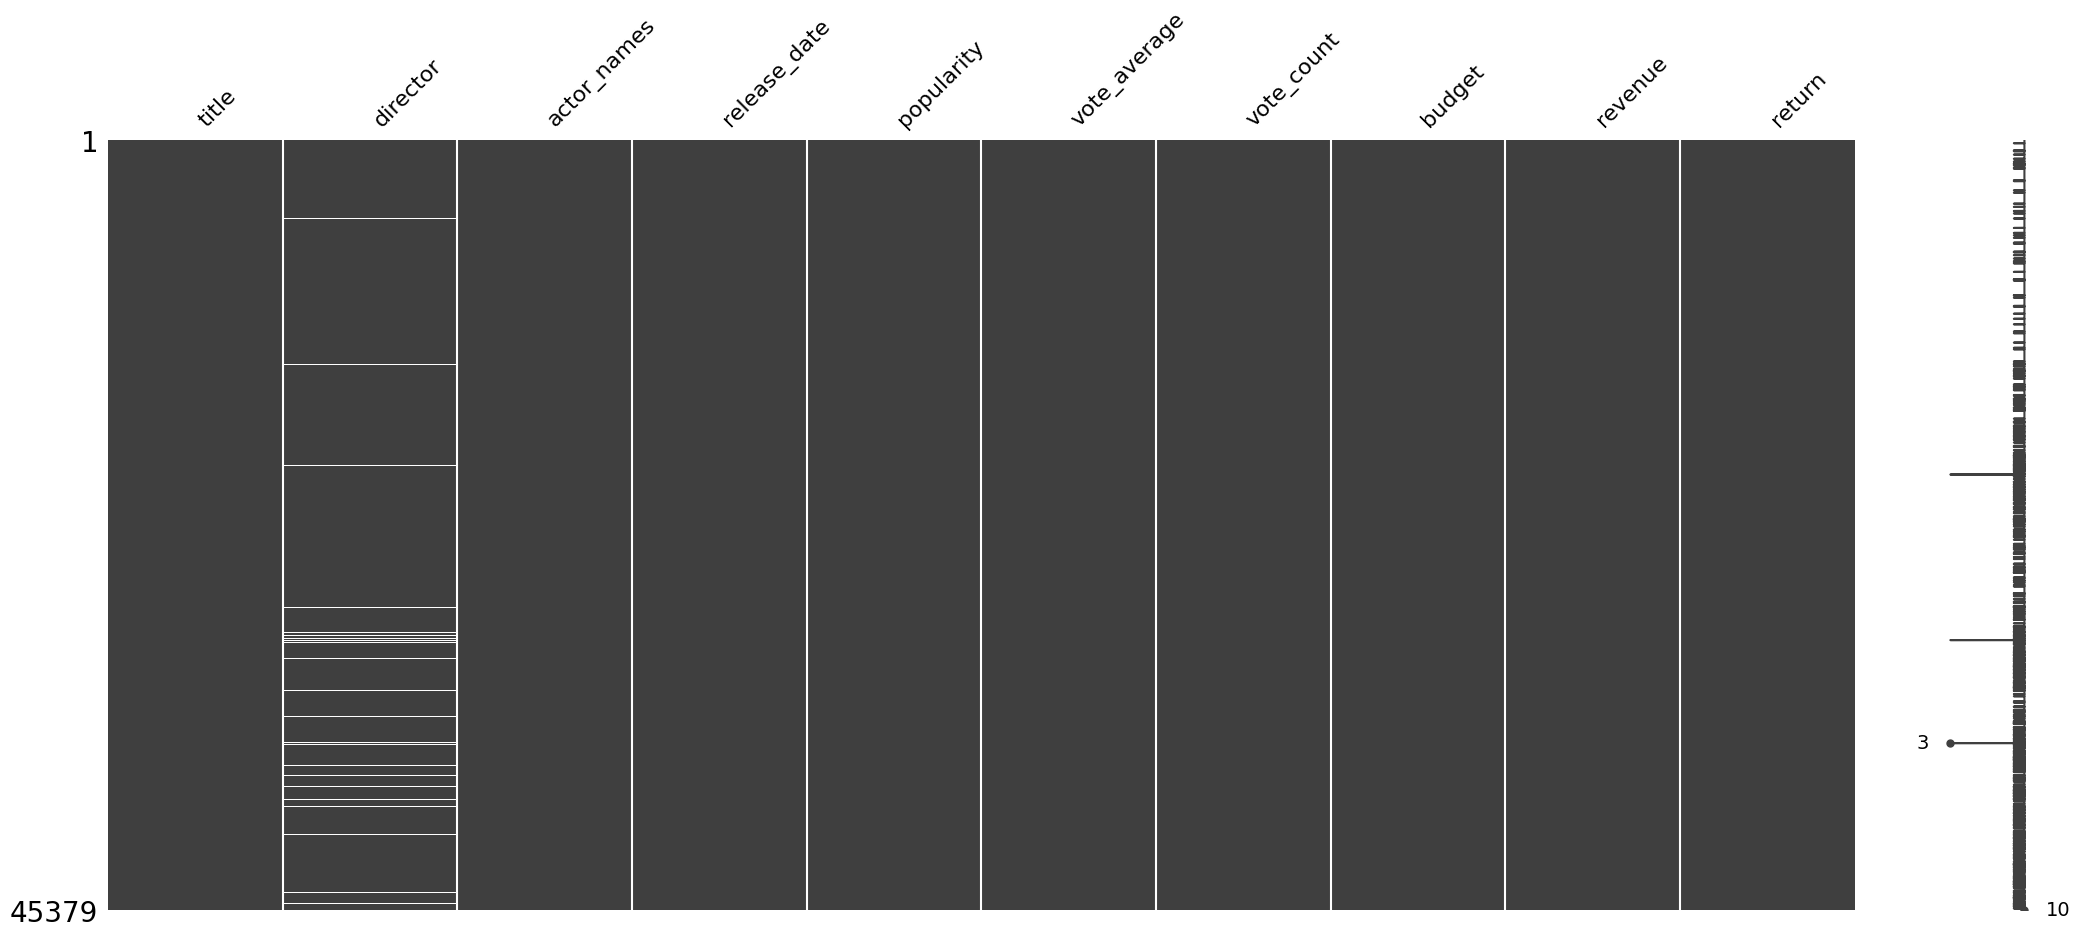

In [ ]:
import missingno as msno
msno.matrix(nuevo_df) 

In [ ]:
nuevo_df['director'] = nuevo_df['director'].fillna('Sin información')

<ipython-input-85-2a3cbd8e7e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df['director'] = nuevo_df['director'].fillna('Sin información')


<Axes: >

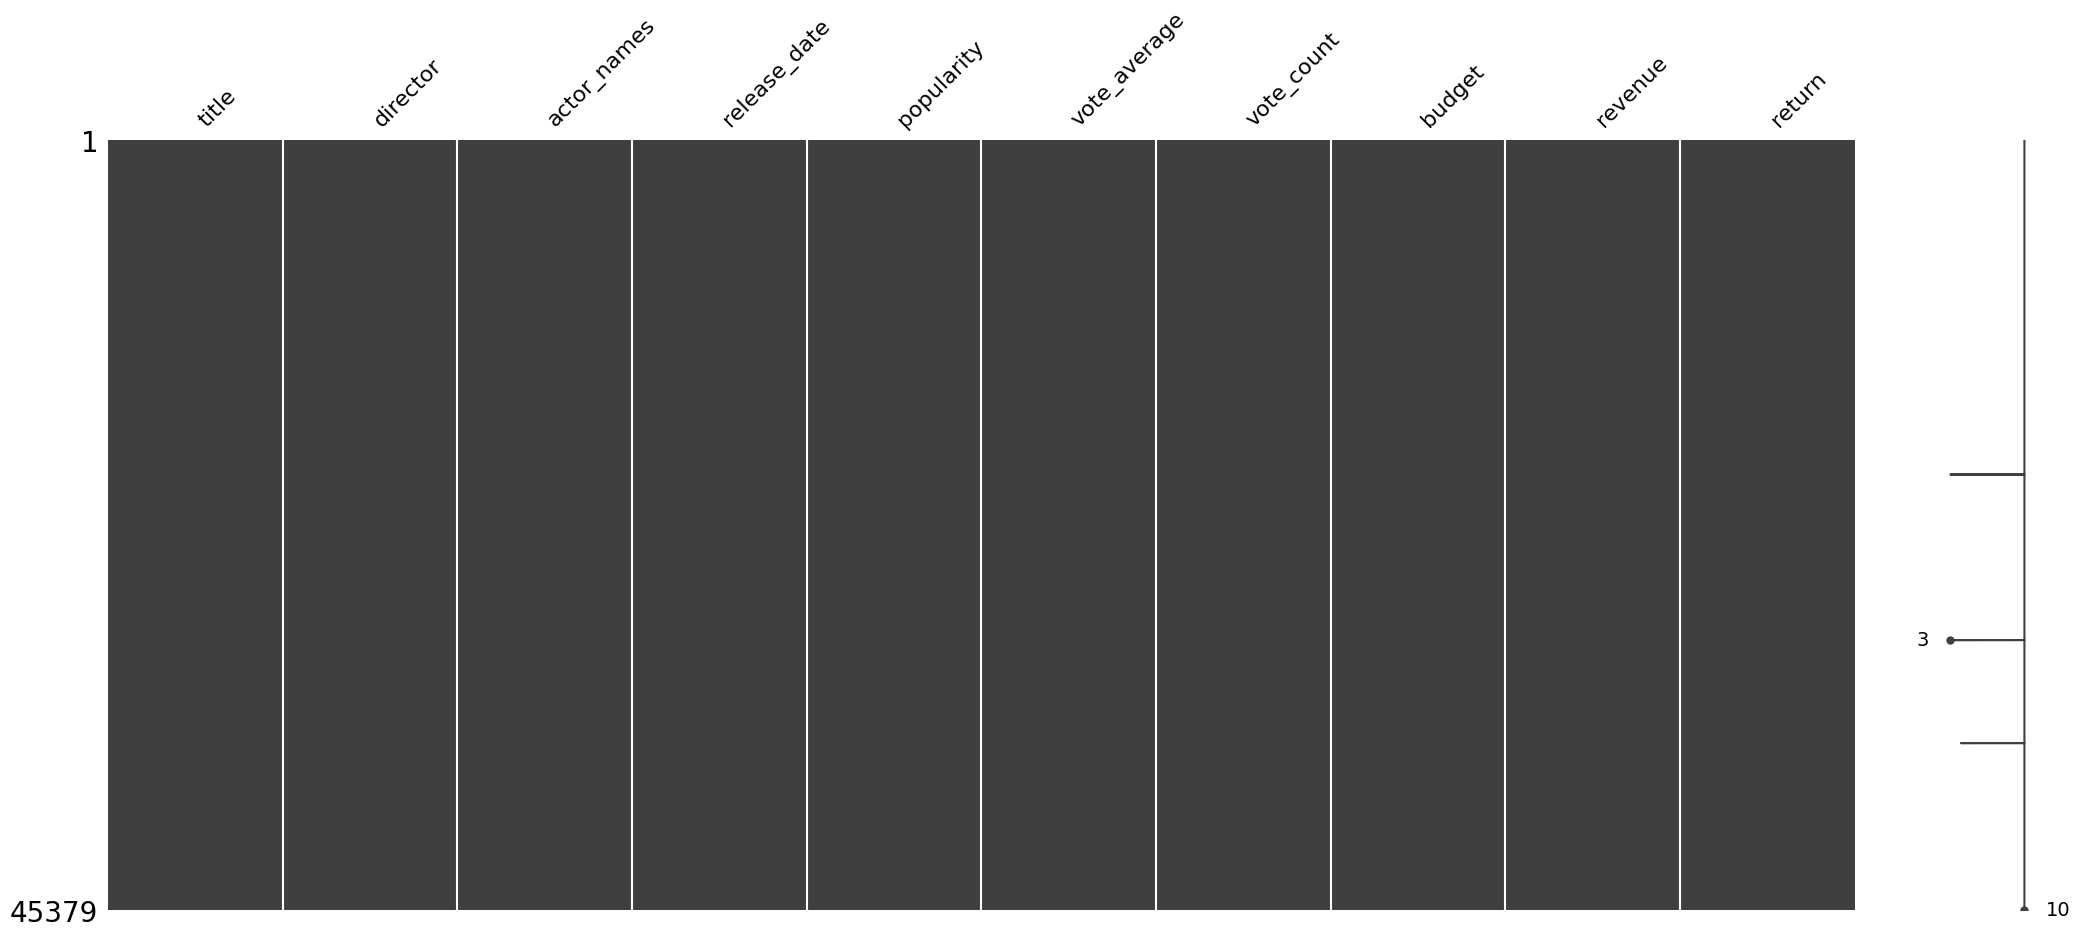

In [ ]:
import missingno as msno
msno.matrix(nuevo_df) 

In [ ]:
nuevo_df.isna().sum()

title           3
director        0
actor_names     0
release_date    3
popularity      2
vote_average    3
vote_count      3
budget          3
revenue         0
return          3
dtype: int64

In [ ]:
nuevo_df[nuevo_df.isna().any(1)]  

<ipython-input-88-f87ad04e2df9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nuevo_df[nuevo_df.isna().any(1)]


,title,director,actor_names,release_date,popularity,vote_average,vote_count,budget,revenue,return
19730,NaN,David O. Russell,"Bradley Cooper, Jennifer Lawrence, Robert De N...",NaT,NaN,NaN,NaN,NaN,0.0,NaN
29503,NaN,D.W. Griffith,"Hal Skelly, Zita Johann, Charlotte Wynters, Ev...",NaT,NaN,NaN,NaN,NaN,0.0,NaN
35587,NaN,Sin información,Jacques Vermeire,NaT,Beware Of Frost Bites,NaN,NaN,NaN,0.0,NaN


In [ ]:
nuevo_df = nuevo_df.dropna()

In [ ]:
nuevo_df.isna().sum()

title           0
director        0
actor_names     0
release_date    0
popularity      0
vote_average    0
vote_count      0
budget          0
revenue         0
return          0
dtype: int64

In [ ]:
nuevo_df.head()

,title,director,actor_names,release_date,popularity,vote_average,vote_count,budget,revenue,return
0,Toy Story,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",1995-10-30,21.946943,7.7,5415.0,30000000.0,373554033.0,12.45
1,Jumanji,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",1995-12-15,17.015539,6.9,2413.0,65000000.0,262797249.0,4.04
2,Grumpier Old Men,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",1995-12-22,11.7129,6.5,92.0,0.0,0.0,0.00
3,Waiting to Exhale,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",1995-12-22,3.859495,6.1,34.0,16000000.0,81452156.0,5.09
4,Father of the Bride Part II,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...",1995-02-10,8.387519,5.7,173.0,0.0,76578911.0,0.00


In [ ]:
# Guardar el nuevo dataframe en un archivo CSV
nuevo_df.to_csv("HenryLabs.csv", index=False)

#EDA

In [ ]:
ml_df = clean_df[['title', 'genre_names', 'vote_average','vote_count', 'popularity']]
ml_df = ml_df.dropna()
ml_df['popularity'] = ml_df['popularity'].astype(float)

In [ ]:
ml_df.describe()

,vote_average,vote_count,popularity
count,45376.000000,45376.000000,45376.000000
mean,5.624070,110.096439,2.926458
std,1.915423,491.742894,6.009672
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.388840
50%,6.000000,10.000000,1.130454
75%,6.800000,34.000000,3.691695
max,10.000000,14075.000000,547.488298


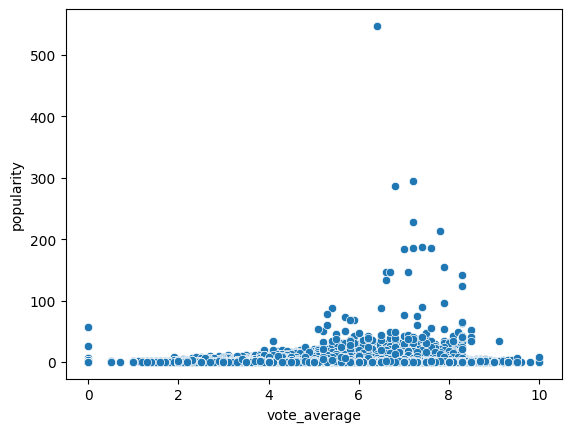

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión entre voto promedio y popularidad
sns.scatterplot(x='vote_average', y='popularity', data=ml_df)
plt.show()


<ipython-input-96-b6edf27e82e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ml_df.corr()


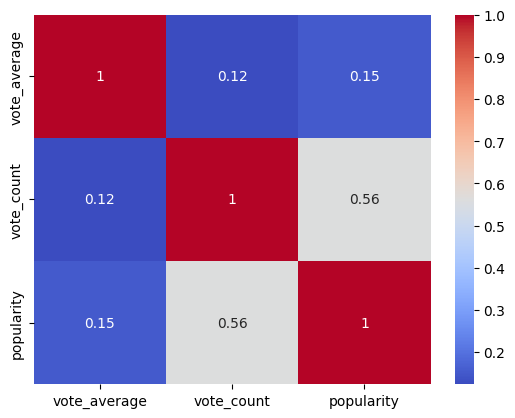

In [ ]:
correlation_matrix = ml_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

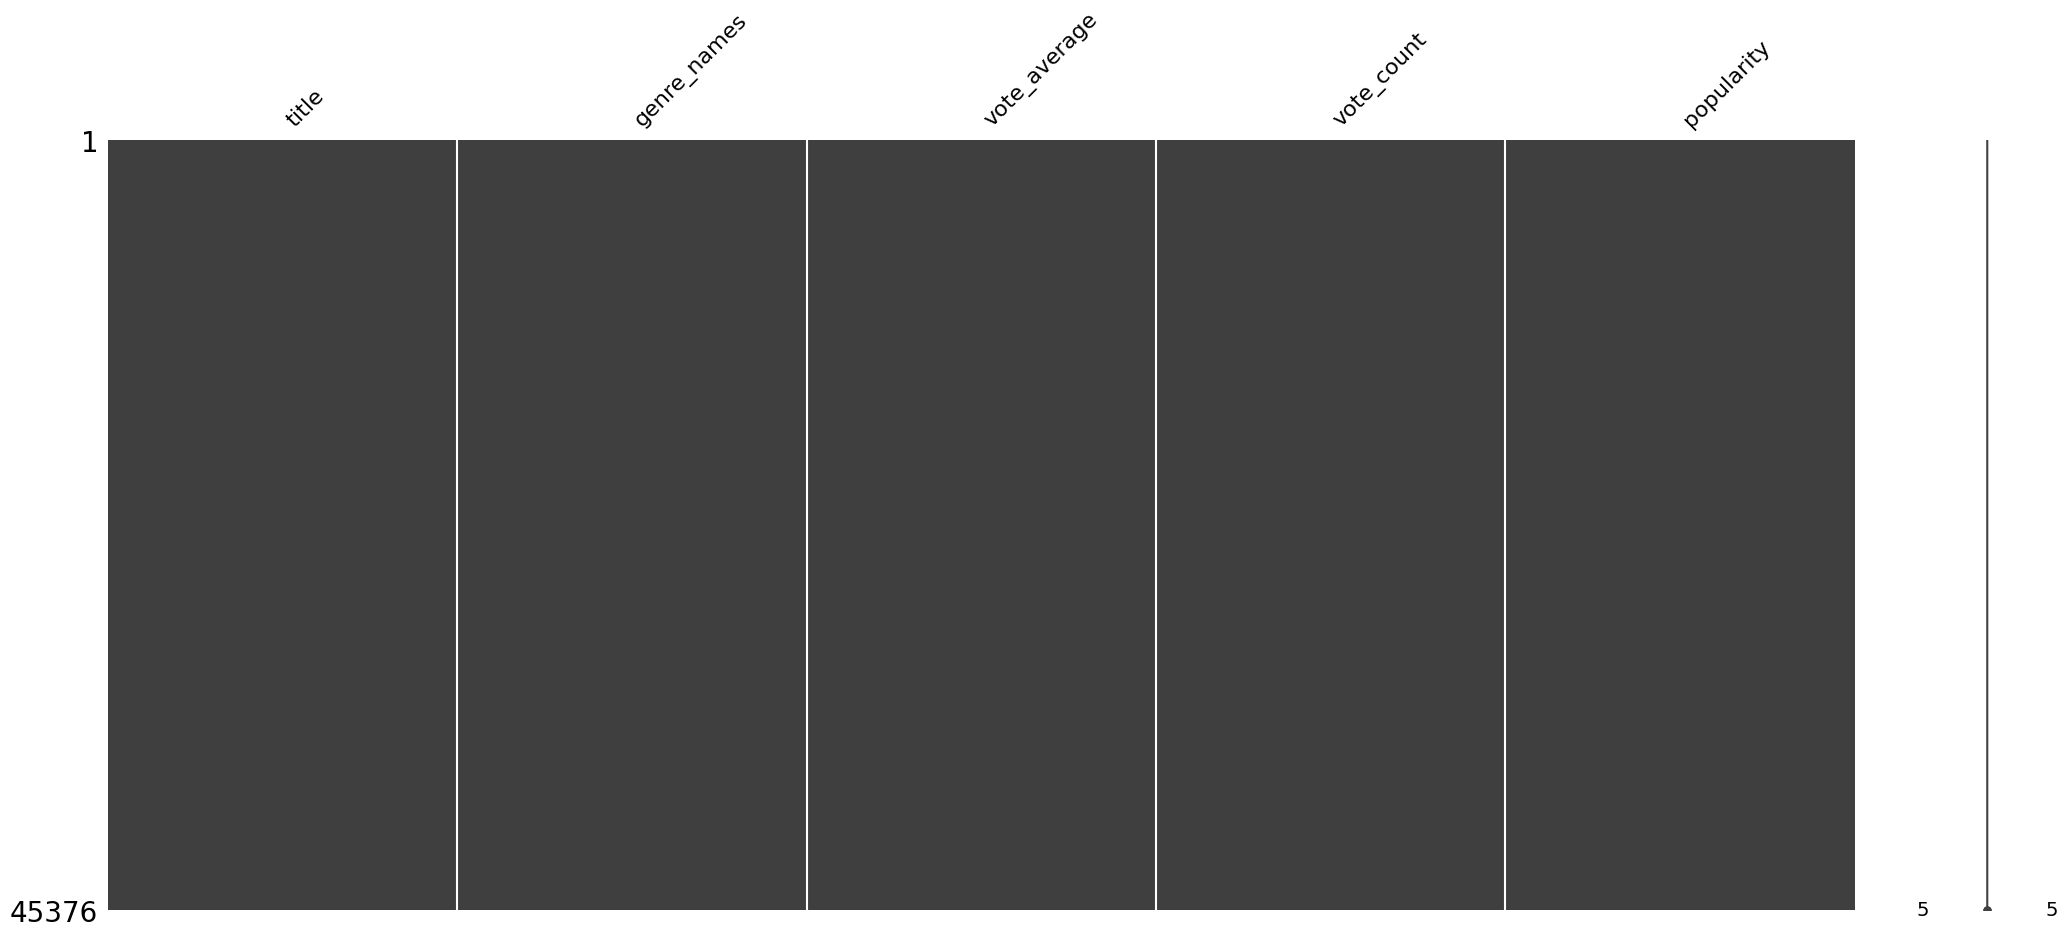

In [ ]:
import missingno as msno

msno.matrix(ml_df)
plt.show()

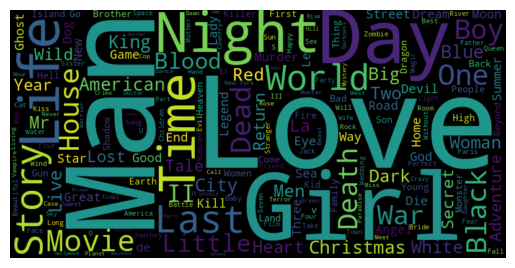

In [ ]:
from wordcloud import WordCloud

# Unir todos los títulos en un solo texto
text = ' '.join(ml_df['title'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#MODELO DE MACHINE LEARNING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Reducir el tamaño del DataFrame a 5000 filas
ml_df = ml_df.head(5000)

# Crear el vectorizador TF-IDF para el título
title_vectorizer = TfidfVectorizer()
title_matrix = title_vectorizer.fit_transform(ml_df['title'])

# Crear el vectorizador TF-IDF para el género
genre_vectorizer = TfidfVectorizer()
genre_matrix = genre_vectorizer.fit_transform(ml_df['genre_names'])

# Combinar las matrices de características
combined_matrix = hstack([title_matrix, genre_matrix])

# Calcular la similitud del coseno
cosine_sim = cosine_similarity(combined_matrix, combined_matrix)

# Obtener recomendaciones para un título específico
def get_recommendations(title, cosine_sim, df, top_n=5):
    index = ml_df[ml_df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    recommendation_indices = [i for i, _ in sim_scores if i != index]
    recommendation_indices = recommendation_indices[:top_n]
    recommendations = df.iloc[recommendation_indices]['title']
    return recommendations

title = "Toy Story"
recommendations = get_recommendations(title, cosine_sim, ml_df)

# Imprimir las recomendaciones
print(recommendations)

2997          Toy Story 2
4799              The Toy
2689    A Christmas Story
695      Oliver & Company
727         A Close Shave
Name: title, dtype: object


In [ ]:
title = "Jumanji"
recommendations = get_recommendations(title, cosine_sim, ml_df)

# Imprimir las recomendaciones
print(recommendations)

59                    The Indian in the Cupboard
892                             The Wizard of Oz
1858                                   Labyrinth
1984                                Return to Oz
4766    Harry Potter and the Philosopher's Stone
Name: title, dtype: object
